### 决策树

In [1]:
from sklearn.datasets import make_classification
import numpy as np

nb_samples = 500
X, Y = make_classification(n_samples=nb_samples,n_features=8,n_informative=3,n_redundant=0,n_classes=3,n_clusters_per_class=1)

+ 查看数据分布情况

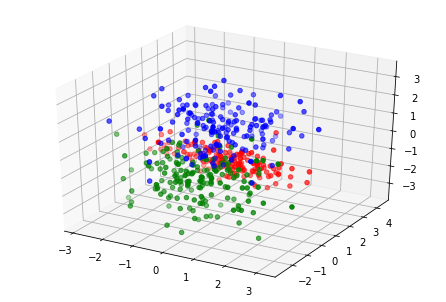

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class0=X[Y==0]
class1=X[Y==1]
class2=X[Y==2]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(class0[:,0], class0[:,1], class0[:,2],c='r')
ax.scatter(class1[:,0], class1[:,1], class1[:,2],c='g')
ax.scatter(class2[:,0], class2[:,1], class2[:,2],c='b')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()
print(cross_val_score(dt,X,Y,scoring='accuracy',cv=10).mean())

0.9382519007603042


In [5]:
from sklearn.tree import export_graphviz

dt.fit(X,Y)
with open('dt.dot','w') as df:
    df = export_graphviz(dt,out_file = df,feature_names=['A','B','C','D','E','F','G','H'],class_names=['C1','C2','C3'])

In [6]:
dt.feature_importances_

array([0.00628518, 0.43417269, 0.28871149, 0.        , 0.25569166,
       0.        , 0.00880046, 0.00633852])

In [7]:
np.argsort(dt.feature_importances_)

array([3, 5, 0, 7, 6, 4, 2, 1], dtype=int64)

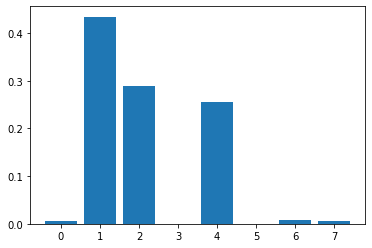

In [8]:
plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)
plt.show()

In [9]:
cross_val_score(DecisionTreeClassifier(),X,Y,scoring='accuracy',cv=10).mean()

0.9501782713085234

In [10]:
cross_val_score(DecisionTreeClassifier(max_features='auto'),X,Y,scoring='accuracy',cv=10).mean()

0.8865968387354943

In [11]:
cross_val_score(DecisionTreeClassifier(min_samples_split=100),X,Y,scoring='accuracy',cv=10).mean()

0.9562599039615847

+ 逻辑回归

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
cross_val_score(lr,X,Y,scoring='accuracy',cv=10).mean()

D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: 

0.9321684673869546

#### 测试复杂情况下的ROC曲线

In [13]:
from sklearn.model_selection import train_test_split

nb_samples = 2000
X,Y=make_classification(n_samples=nb_samples,n_features=8,n_informative=6,n_redundant=2,n_classes=2,n_clusters_per_class=4)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

- 决策树

In [15]:
from sklearn import metrics

dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_score= dt.predict_proba(X_test)

In [21]:
print(X_test)

[[-1.58535751  1.48460909  3.3073987  ...  0.48281357 -0.69678808
  -1.6070873 ]
 [ 0.52667291  3.02206689  2.62756352 ...  0.91256962 -0.82841056
  -1.77920118]
 [ 0.15012655  1.60386503  2.45304553 ...  0.05956623  0.31072676
  -1.31630313]
 ...
 [ 0.52093358  1.54048933 -1.29923254 ...  0.9668383  -2.3058934
   1.53609333]
 [-0.24665369 -1.32356108  2.38608614 ...  0.62233198 -0.66636053
  -2.09706772]
 [ 0.63469543  0.91748917 -0.67980981 ... -2.99778098 -1.67082995
   4.06233583]]


In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Y_pred = dt.predict(X_test)
dt_fpr,dt_tpr,dt_thresholds = roc_curve(Y_test,Y_pred)

In [24]:
print(dt_fpr)

[0.         0.19607843 1.        ]


- logist回归

In [25]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_scores = lr.decision_function(X_test)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:

fpr,tpr,thresholds = roc_curve(Y_test,Y_scores)

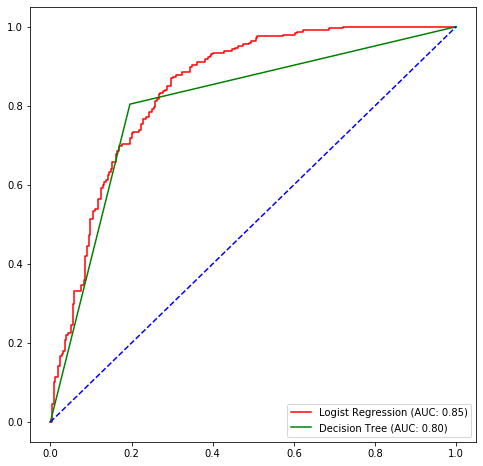

In [28]:
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,color='red',label='Logist Regression (AUC: %.2f)'%auc(fpr,tpr))
plt.plot(dt_fpr,dt_tpr,color='green',label='Decision Tree (AUC: %.2f)'%auc(dt_fpr,dt_tpr))
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.legend(loc='lower right')
plt.show()

### 集成学习

1. **随机森林**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
digits = datasets.load_digits()

nb_classification = 100
rf_accuracy = []

for i in range(1,nb_classification):
    a = cross_val_score(RandomForestClassifier(n_estimators=i),digits.data,digits.target, scoring='accuracy',cv=10).mean()
    rf_accuracy.append(a)

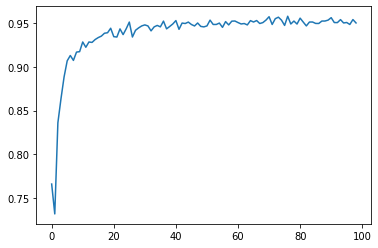

In [37]:
plt.plot(range(0,len(rf_accuracy)),rf_accuracy)

In [38]:
nb_samples = 1000
X, Y = make_classification(n_samples=nb_samples,n_features=50,n_informative=30,n_redundant=20,n_classes=2,n_clusters_per_class=50)

In [39]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
x = np.argsort(-rf.feature_importances_)
y = rf.feature_importances_[np.argsort(-rf.feature_importances_)]

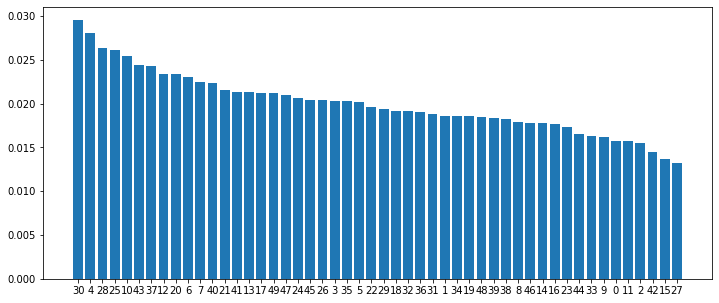

In [63]:
plt.figure(figsize=(12,5))
plt.xticks(np.arange(len(x)), x)
plt.bar(np.arange(len(x)), y)
plt.show()

2. **AdaBoost**

In [64]:
from sklearn.ensemble import AdaBoostClassifier

ab_accuracy = []
nb_classification = 100
for i in range(1,nb_classification):
    a = cross_val_score(AdaBoostClassifier(n_estimators=i,learning_rate=0.1),digits.data,digits.target,scoring='accuracy',cv=10).mean()
    ab_accuracy.append(a)

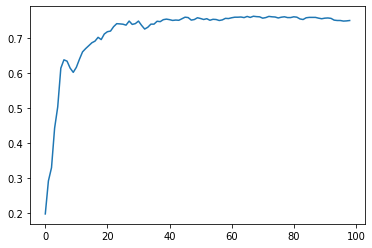

In [65]:
plt.plot(range(0,len(ab_accuracy)),ab_accuracy)

3. **投票分类器**